# Figure 4

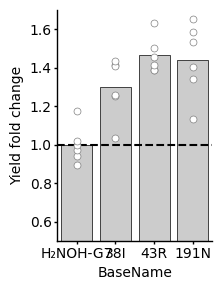

In [1]:
import pandas as pd
import ast
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['svg.fonttype'] = 'none'

df = pd.read_csv('TTN_yield_all.csv')
def clean_plt(ax):
    ax.tick_params(direction='out', length=2, width=1.0)
    ax.spines['bottom'].set_linewidth(1.0)
    ax.spines['top'].set_linewidth(0)
    ax.spines['left'].set_linewidth(1.0)
    ax.spines['right'].set_linewidth(0)
    ax.tick_params(labelsize=10.0)
    ax.tick_params(axis='x', which='major', pad=2.0)
    #plt.xticks(rotation=90)
    ax.tick_params(axis='y', which='major', pad=2.0)
    return ax

plt.figure(figsize=(2, 3))
df = df.reset_index()
order = ['H₂NOH-G7', '38I', '43R', '191N']
parent_mean = np.mean(df[df['BaseName'] == 'H₂NOH-G7']['Yield_individual_<lambda>'].values)

df['Yield fold change'] = [y/parent_mean for y in df['Yield_individual_<lambda>'].values]
df['Yield %'] = [y for y in df['Yield_individual_<lambda>'].values]

ax = sns.barplot(df, x='BaseName', y='Yield fold change', order=order,
                 err_kws={"color": 'black', "linewidth": 0},linewidth=0.5, edgecolor="black", capsize=.25, color='#cccc')
ax = sns.stripplot(df, x='BaseName', y='Yield fold change', ax=ax, jitter=0, c='white', edgecolor='grey', order=order, linewidth=0.5)

plt.axhline(y=1.0, color='black', linestyle='--')
ax.set_ylim(0.5, 1.7)
ax = clean_plt(ax)
plt.savefig('figs/yield.svg', bbox_inches='tight')
plt.savefig('figs/yield.png', bbox_inches='tight')

In [2]:
catalyst_info = {
    'H₂NOH-G7-1': {'conc_uM': 0.9675, 'vol_uL': 340},
    'H₂NOH-G7-2': {'conc_uM': 0.8401, 'vol_uL': 340},
    '38I-1': {'conc_uM': 0.7015, 'vol_uL': 340},
    '38I-2': {'conc_uM': 0.5788, 'vol_uL': 340},
    '43R-1': {'conc_uM': 0.9814, 'vol_uL': 340},
    '43R-2': {'conc_uM': 0.6418, 'vol_uL': 340},
    '191N-1': {'conc_uM': 0.6509, 'vol_uL': 340},
    '191N-2': {'conc_uM': 0.6219, 'vol_uL': 340},
    '38I_43R-1': {'conc_uM': 0.4196, 'vol_uL': 340},
    '38I_43R-2': {'conc_uM': 0.5653, 'vol_uL': 340},
    '38I_191N-1': {'conc_uM': 0.5405, 'vol_uL': 340},
    '38I_191N-2': {'conc_uM': 0.7010, 'vol_uL': 340},
    '43R_191N-1': {'conc_uM': 0.7744, 'vol_uL': 340},
    '43R_191N-2': {'conc_uM': 0.9873, 'vol_uL': 340},
    '38I_43R_191N-1': {'conc_uM': 0.9623, 'vol_uL': 340},
    '38I_43R_191N-2': {'conc_uM': 0.7610, 'vol_uL': 340},
}
catalyst_info

{'H₂NOH-G7-1': {'conc_uM': 0.9675, 'vol_uL': 340},
 'H₂NOH-G7-2': {'conc_uM': 0.8401, 'vol_uL': 340},
 '38I-1': {'conc_uM': 0.7015, 'vol_uL': 340},
 '38I-2': {'conc_uM': 0.5788, 'vol_uL': 340},
 '43R-1': {'conc_uM': 0.9814, 'vol_uL': 340},
 '43R-2': {'conc_uM': 0.6418, 'vol_uL': 340},
 '191N-1': {'conc_uM': 0.6509, 'vol_uL': 340},
 '191N-2': {'conc_uM': 0.6219, 'vol_uL': 340},
 '38I_43R-1': {'conc_uM': 0.4196, 'vol_uL': 340},
 '38I_43R-2': {'conc_uM': 0.5653, 'vol_uL': 340},
 '38I_191N-1': {'conc_uM': 0.5405, 'vol_uL': 340},
 '38I_191N-2': {'conc_uM': 0.701, 'vol_uL': 340},
 '43R_191N-1': {'conc_uM': 0.7744, 'vol_uL': 340},
 '43R_191N-2': {'conc_uM': 0.9873, 'vol_uL': 340},
 '38I_43R_191N-1': {'conc_uM': 0.9623, 'vol_uL': 340},
 '38I_43R_191N-2': {'conc_uM': 0.761, 'vol_uL': 340}}

In [3]:
ttns = []
substrate_concentration = 5/1000 # mM
reaction_vol = 400/1000000 # uL
mol_product = substrate_concentration*reaction_vol

for name, rep, yield_ in df[['BaseName', 'Replicate', 'Yield_individual_<lambda>']].values:
    cat_info = catalyst_info[f'{name}-{rep}']
    product = yield_ * mol_product
    enzyme = (340/1000000) * (cat_info['conc_uM']/1000000)
    ttn = product/enzyme
    ttns.append(ttn)
df['TTN'] = ttns

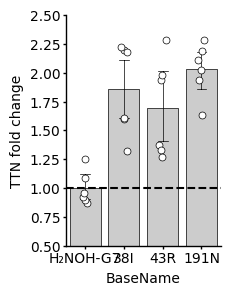

In [4]:
plt.figure(figsize=(2, 3))
parent_mean = np.mean(df[df['BaseName'] == 'H₂NOH-G7']['TTN'].values)
df['TTN fold change'] = [t/parent_mean for t in ttns]
ax = sns.barplot(df, x='BaseName', y='TTN fold change', order=order,
                 err_kws={"color": 'black', "linewidth": 0.5},linewidth=0.5, edgecolor="black", capsize=.25, color='#cccc')
ax = sns.stripplot(df, x='BaseName', y='TTN fold change', ax=ax, jitter=0.1, s=5, c='white', edgecolor='black', order=order, linewidth=0.5)
plt.axhline(y=1, color='black', linestyle='--')
ax = clean_plt(ax)
ax.set_ylim(0.5, 2.5)

plt.savefig('figs/TTN.svg', bbox_inches='tight')